Reference - https://blog.quantinsti.com/random-walk/

In [23]:
# dependencies
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
# periods to simulate
periods = 50000

In [25]:
# # price data from
# #  yahoo finance
# df = yf.download('AAPL','2020-06-01', '2021-01-01', interval='1d')
# df['Close'].plot(figsize=(6,4))
# plt.legend();
# df.tail()

In [26]:
# price data from:
#  https://www.kaggle.com/imetomi/eur-usd-forex-pair-historical-data-2002-2019?select=eurusd_minute.csv
df = pd.read_csv('./resources/eurusd_hour.csv', index_col=0, parse_dates=[['Date', 'Time']])
df.drop(['BCh', 'AO', 'AH', 'AL', 'AC', 'ACh'], axis = 1, inplace = True)
df = df.rename(columns={'BO': 'Open', 'BH': 'High', 'BL': 'Low', 'BC': 'Close'})
df.index.names = ['Date']
df

,Open,High,Low,Close
Date,,,,
2005-05-02 00:00:00,1.28520,1.28520,1.28400,1.28440
2005-05-02 01:00:00,1.28440,1.28480,1.28390,1.28420
2005-05-02 02:00:00,1.28430,1.28540,1.28410,1.28510
2005-05-02 03:00:00,1.28510,1.28590,1.28500,1.28510
2005-05-02 04:00:00,1.28520,1.28590,1.28490,1.28550
...,...,...,...,...
2020-04-29 18:00:00,1.08620,1.08851,1.08611,1.08713
2020-04-29 19:00:00,1.08711,1.08823,1.08659,1.08748
2020-04-29 20:00:00,1.08747,1.08788,1.08691,1.08708


In [27]:
# simulate ohlc values based on characterisitics (change, mean, sd) of real data

# seed value for the calculations
np.random.seed(42)

# characterise the data - percentage change, mean, and sd
df['daily_pc_op'] = df['Open'].pct_change()
df['daily_pc_hi'] = df['High'].pct_change()
df['daily_pc_lo'] = df['Low'].pct_change()
df['daily_pc_cl'] = df['Close'].pct_change()

mu_op = df['daily_pc_op'].iloc[:-periods].mean()
mu_hi = df['daily_pc_hi'].iloc[:-periods].mean()
mu_lo = df['daily_pc_lo'].iloc[:-periods].mean()
mu_cl = df['daily_pc_cl'].iloc[:-periods].mean()

sigma_op = df['daily_pc_op'].iloc[:-periods].std()
sigma_hi = df['daily_pc_hi'].iloc[:-periods].std()
sigma_lo = df['daily_pc_lo'].iloc[:-periods].std()
sigma_cl = df['daily_pc_cl'].iloc[:-periods].std()

# initialise a simulation dictionary
simulation = {}

# starting values
simulation["Simulation_op"] = [df['Open'].iloc[-periods]]
simulation["Simulation_hi"] = [df['High'].iloc[-periods]]
simulation["Simulation_lo"] = [df['Low'].iloc[-periods]]
simulation["Simulation_cl"] = [df['Close'].iloc[-periods]]

# random walk simulation for same period as real data
# anchor each path to the close of the previous period
for d in range(periods-1):
    simulation["Simulation_op"].append(simulation["Simulation_cl"][-1]*np.exp((mu_op-(sigma_op**2/2))+sigma_op*np.random.normal()))
    simulation["Simulation_hi"].append(simulation["Simulation_cl"][-1]*np.exp((mu_hi-(sigma_hi**2/2))+sigma_hi*np.random.normal()))
    simulation["Simulation_lo"].append(simulation["Simulation_cl"][-1]*np.exp((mu_lo-(sigma_lo**2/2))+sigma_lo*np.random.normal()))
    simulation["Simulation_cl"].append(simulation["Simulation_cl"][-1]*np.exp((mu_cl-(sigma_cl**2/2))+sigma_cl*np.random.normal()))

In [28]:
# simulated data to dataframe
simulation=pd.DataFrame(simulation)
simulation.index=df[-periods:].index
simulation = simulation.rename(columns={'Simulation_op': 'Open', 'Simulation_hi': 'High', 'Simulation_lo': 'Low', 'Simulation_cl': 'Close'})
simulation

,Open,High,Low,Close
Date,,,,
2012-03-28 02:00:00,1.332210,1.333190,1.332040,1.333040
2012-03-28 03:00:00,1.333962,1.332805,1.334146,1.335867
2012-03-28 04:00:00,1.335433,1.335467,1.338570,1.337294
2012-03-28 05:00:00,1.336422,1.338226,1.336502,1.336429
2012-03-28 06:00:00,1.336880,1.333155,1.333484,1.335386
...,...,...,...,...
2020-04-29 18:00:00,1.329569,1.332004,1.331348,1.331639
2020-04-29 19:00:00,1.330312,1.331898,1.333725,1.332836
2020-04-29 20:00:00,1.335405,1.333093,1.332991,1.331033


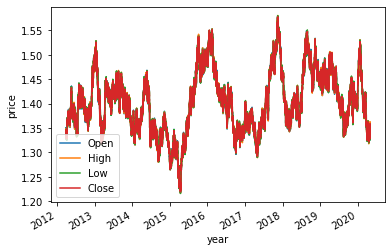

In [29]:
# plot simulated data
simulation.plot(figsize=(6,4),grid=False,legend=True)
plt.xlabel('year')
plt.ylabel('price');

In [30]:
# real data to dataframe for amtching range
real = df[['Open','High','Low','Close']][-periods:]

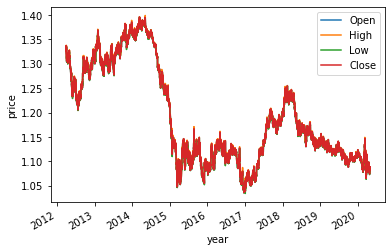

In [31]:
# plot real data
real.plot(figsize=(6,4),grid=False,legend=True)
plt.xlabel('year')
plt.ylabel('price');

In [32]:
# simulated data to csv
simulation.to_csv('./resources/eurusd_hour_simulated.csv', index=True)

In [33]:
# real data to csv
real.to_csv('./resources/eurusd_hour_real.csv', index=True)